In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

Convertimos los rangos de redshift a fator de escala ya que los datos están distribuidos por este parámetro

In [2]:
redshift = [4,5,6,7,8]

for z in redshift:
    print("z = %i ===> a = %.5f"%(z, 1/(z+1)))

z = 4 ===> a = 0.20000
z = 5 ===> a = 0.16667
z = 6 ===> a = 0.14286
z = 7 ===> a = 0.12500
z = 8 ===> a = 0.11111


In [3]:
fac_escala = ["a0.109623.dat","a0.126498.dat","a0.141685.dat","a0.166998.dat","a0.202435.dat"]
fac_escala = fac_escala[::-1]

### Halo Mass Function

In [9]:
!head -n 10 "umachine-dr1/data/smhm/averages/hm_averages_a0.055623.dat"

#Halo mass averages in bins of observed stellar mass.
#For satellites, the satellite peak halo mass is used, rather than the host halo's peak halo mass.
#<Mh>: Linear average of peak halo mass (in Msun) in each bin.
#<Log(Mh)>: Average of Log_10(peak halo mass/Msun) in each bin.
#<WL(Mh)>: <Mh^2/3>^(3/2), i.e., weak-lensing-averaged halo mass; i.e., average of (peak halo mass (in Msun) to the two-thirds power), taken to the 3/2 power.
#Bestfit_X_Counts is the number of galaxies of type X in the bin for the bestfit model.
#Log10(SM_Center)(0) <Mh>(1) Err+(2) Err-(3) <Log(Mh)>(4) Err+(5) Err-(6) <WL(Mh)>(7) Err+(8) Err-(9) <Mh>(10) Err+(11) Err-(12) <Log(Mh)>(13) Err+(14) Err-(15) <WL(Mh)>(16) Err+(17) Err-(18) <Mh>(19) Err+(20) Err-(21) <Log(Mh)>(22) Err+(23) Err-(24) <WL(Mh)>(25) Err+(26) Err-(27) <Mh>(28) Err+(29) Err-(30) <Log(Mh)>(31) Err+(32) Err-(33) <WL(Mh)>(34) Err+(35) Err-(36) <Mh>(37) Err+(38) Err-(39) <Log(Mh)>(40) Err+(41) Err-(42) <WL(Mh)>(43) Err+(44) Err-(45) <Mh>(46) Er

/Users/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


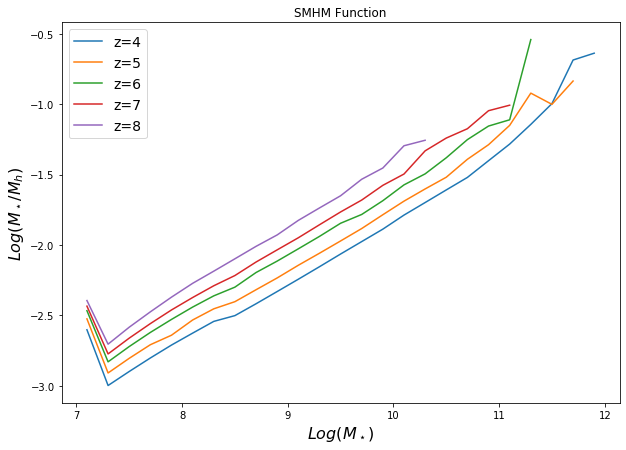

In [87]:
functions_smhm = []
b_hm_errors = []
B_hm_errors = []

plt.figure(figsize=(10,7))
plt.title("SMHM Function")

for i in range(0,5):
    name = "umachine-dr1/data/smhm/averages/hm_averages_%s"%(fac_escala[i])
    tabla = pd.read_csv(name,skiprows=6,sep="\s")
    tab = tabla.loc[:,['<Log(Mh)>(4)', '<Log(Mh)>(13)','<Log(Mh)>(22)', 
       '<Log(Mh)>(31)', '<Log(Mh)>(40)', '<Log(Mh)>(49)', '<Log(Mh)>(58)']]
    tab[tab == 0]=np.nan
    tabla["Log<Mh>"] = tab.median(axis=1)
    x = tabla["#Log10(SM_Center)(0)"].values
    y = tabla["Log<Mh>"].values
    z = tabla["#Log10(SM_Center)(0)"].values - tabla["Log<Mh>"].values
    
    b_y = (tab.min(axis=1)).values
    B_y = (tab.max(axis=1)).values
    
    functions_smhm.append(interp1d(x,y))
    b_hm_errors.append(interp1d(tabla["Log<Mh>"].values,b_y))
    B_hm_errors.append(interp1d(tabla["Log<Mh>"].values,B_y))
    plt.plot(x,z, label="z=%i"%(i+4))

plt.xlabel("$Log(M_\star)$", fontsize=16)
plt.ylabel("$Log(M_\star/M_h)$", fontsize=16)
plt.legend(fontsize=14)
f_pos = lambda z: int(z+0.5)-4

In [75]:
tab = tabla.loc[:,['<Log(Mh)>(4)', '<Log(Mh)>(13)','<Log(Mh)>(22)', 
       '<Log(Mh)>(31)', '<Log(Mh)>(40)', '<Log(Mh)>(49)', '<Log(Mh)>(58)']]

tab[tab == 0]=np.nan
tab.median(axis=1)

0      9.49405
1     10.00360
2     10.08330
3     10.17430
4     10.27000
5     10.37200
6     10.48570
7     10.59790
8     10.70960
9     10.82850
10    10.92530
11    11.03720
12    11.15060
13    11.23340
14    11.35360
15    11.39570
16    11.55670
17         NaN
18    11.87580
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
dtype: float64

In [52]:
tabla.columns

Index(['#Log10(SM_Center)(0)', '<Mh>(1)', 'Err+(2)', 'Err-(3)', '<Log(Mh)>(4)',
       'Err+(5)', 'Err-(6)', '<WL(Mh)>(7)', 'Err+(8)', 'Err-(9)', '<Mh>(10)',
       'Err+(11)', 'Err-(12)', '<Log(Mh)>(13)', 'Err+(14)', 'Err-(15)',
       '<WL(Mh)>(16)', 'Err+(17)', 'Err-(18)', '<Mh>(19)', 'Err+(20)',
       'Err-(21)', '<Log(Mh)>(22)', 'Err+(23)', 'Err-(24)', '<WL(Mh)>(25)',
       'Err+(26)', 'Err-(27)', '<Mh>(28)', 'Err+(29)', 'Err-(30)',
       '<Log(Mh)>(31)', 'Err+(32)', 'Err-(33)', '<WL(Mh)>(34)', 'Err+(35)',
       'Err-(36)', '<Mh>(37)', 'Err+(38)', 'Err-(39)', '<Log(Mh)>(40)',
       'Err+(41)', 'Err-(42)', '<WL(Mh)>(43)', 'Err+(44)', 'Err-(45)',
       '<Mh>(46)', 'Err+(47)', 'Err-(48)', '<Log(Mh)>(49)', 'Err+(50)',
       'Err-(51)', '<WL(Mh)>(52)', 'Err+(53)', 'Err-(54)', '<Mh>(55)',
       'Err+(56)', 'Err-(57)', '<Log(Mh)>(58)', 'Err+(59)', 'Err-(60)',
       '<WL(Mh)>(61)', 'Err+(62)', 'Err-(63)', '(64)', 'HM_Left_Edge(65)',
       'HM_Right_Edge(66)', 'Bestfit_Galaxy_Cou

### UV - SM

/Users/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/Users/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/Users/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users

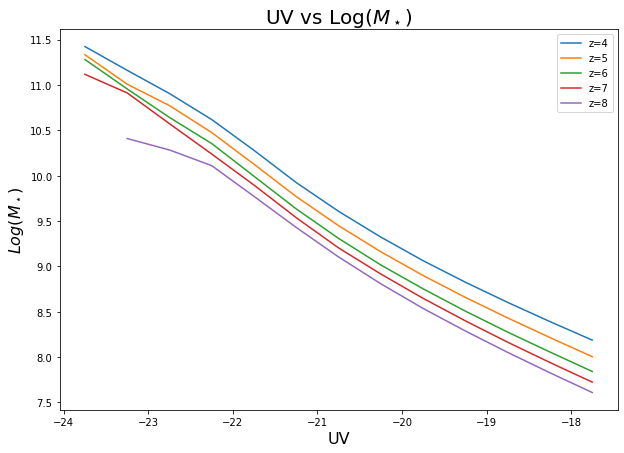

In [93]:
functions_uvsm = []
b_sm_errors = []
B_sm_errors = []
plt.figure(figsize=(10,7))
plt.title("UV vs Log($M_\star$)", fontsize=20)

for i in range(3,8):
    name = "umachine-dr1/data/uvsm/uvsm_z%.1f-z%.1f.dat"%(i+0.5,i+1.5)
    tabla = pd.read_csv(name,skiprows=3,sep="\s")
    tabla = tabla.sort_values(["#UV_Center"], ascending=1)
    x = tabla["#UV_Center"].values
    y = np.log10(tabla["Median_SM"].values)
    b_y = tabla["Err-"].values
    B_y = tabla["Err+"].values
    functions_uvsm.append(interp1d(x,y))
    b_sm_errors.append(interp1d(tabla["Median_SM"].values,b_y))
    B_sm_errors.append(interp1d(tabla["Median_SM"].values,B_y))

    plt.plot(x,y, label="z=%i"%(i+1))

plt.xlabel("UV", fontsize=16)
plt.ylabel("$Log(M_\star)$", fontsize=16)
plt.legend(fontsize=14)
plt.legend()
f_pos = lambda z: int(z+0.5)-4

    

In [92]:
tabla

,#UV_Center,Median_SM,Err+,Err-,UV_Min,UV_Max
0,-23.75,0.000000e+00,9.825690e+10,0.000000e+00,-24.0,-23.5
1,-23.25,2.563220e+10,5.286870e+10,1.088520e+10,-23.5,-23.0
2,-22.75,1.917370e+10,1.965560e+10,8.443250e+09,-23.0,-22.5
3,-22.25,1.287060e+10,4.097030e+09,6.607990e+09,-22.5,-22.0
4,-21.75,5.902090e+09,1.700020e+09,2.634610e+09,-22.0,-21.5
5,-21.25,2.678170e+09,6.539300e+08,1.015190e+09,-21.5,-21.0
6,-20.75,1.268150e+09,2.678340e+08,3.814680e+08,-21.0,-20.5
7,-20.25,6.414960e+08,1.256240e+08,1.548510e+08,-20.5,-20.0
8,-19.75,3.432780e+08,5.333270e+07,6.862580e+07,-20.0,-19.5
9,-19.25,1.935530e+08,2.868450e+07,3.222320e+07,-19.5,-19.0


In [7]:
fink_a = pd.read_csv("Finkelstein/ApJ810_2015/apj810.tsv", sep=";", skiprows=53, index_col=None)
fink_b = pd.read_csv("Finkelstein/ApJ814_2015/apj814.tsv", sep=";", skiprows=72, index_col=None)

fink_a = fink_a.iloc[2:,:]
fink_b = fink_b.iloc[2:,:]

fink_a.ID = [i.replace(" ","") for i in fink_a.ID]

ids = fink_b["ID"].values
s = fink_a["ID"].isin(ids)
fink_a_b = fink_a[s]
fink_a_b=pd.merge(fink_a_b,fink_b,on=["ID","_RAJ2000","_DEJ2000","RAJ2000","DEJ2000"])
fink_a_b

,_RAJ2000,_DEJ2000,ID,HRG14,RAJ2000,DEJ2000,zphot,b_zphot,B_zphot,1500Mag,...,Age,b_Age,B_Age,E(B-V),b_E(B-V),B_E(B-V),SFR,b_SFR,B_SFR,Simbad
0,053.09684000,-27.86607389,z4_GSD_34736,HRG14 J033223.24-275157.9,053.096840,-27.866074,3.51,0.38,3.64,-21.36,...,10,19,101,0.34,0.18,0.34,451,109,434,Simbad
1,053.08689111,-27.84413889,z4_GSD_30292,HRG14 J033220.85-275038.9,053.086891,-27.844139,3.54,0.40,3.70,-21.03,...,57,49,90,0.24,0.16,0.32,132,64,322,Simbad
2,053.08736806,-27.83953500,z4_GSD_29028,HRG14 J033220.97-275022.3,053.087368,-27.839535,3.60,3.48,3.73,-21.03,...,80,80,101,0.10,0.06,0.10,38,25,40,Simbad
3,053.12141389,-27.81462111,z4_GSD_21002,HRG14 J033229.14-274852.6,053.121414,-27.814621,3.63,3.57,3.73,-21.18,...,30,10,30,0.18,0.16,0.24,93,70,152,Simbad
4,053.03123889,-27.78521500,z4_GSD_11269,HRG14 J033207.50-274706.8,053.031239,-27.785215,3.63,3.53,3.77,-21.30,...,49,40,101,0.10,0.10,0.24,45,43,176,Simbad
5,053.10742194,-27.86929889,z4_GSD_35257,HRG14 J033225.78-275209.5,053.107422,-27.869299,3.65,3.53,3.82,-21.09,...,101,71,101,0.28,0.10,0.28,222,45,240,Simbad
6,053.07173500,-27.79843694,z4_GSD_15786,HRG14 J033217.22-274754.4,053.071735,-27.798437,3.67,3.59,3.74,-21.05,...,49,57,1015,0.04,0.00,0.10,19,14,33,Simbad
7,053.13885889,-27.83537111,z4_GSD_27735,HRG14 J033233.33-275007.3,053.138859,-27.835371,3.74,3.67,3.82,-21.20,...,30,19,57,0.14,0.02,0.18,54,17,78,Simbad
8,053.06626111,-27.84905611,z4_GSD_31543,HRG14 J033215.90-275056.6,053.066261,-27.849056,3.81,3.68,3.94,-21.37,...,49,30,57,0.12,0.10,0.20,52,41,117,Simbad
9,053.07618306,-27.86636000,z4_GSD_34857,HRG14 J033218.28-275158.9,053.076183,-27.866360,3.97,3.87,4.11,-21.80,...,286,40,286,0.16,0.14,0.16,123,96,128,Simbad


In [14]:
fink_a_b.columns

Index(['_RAJ2000', '_DEJ2000', 'ID', 'HRG14', 'RAJ2000', 'DEJ2000', 'zphot',
       'b_zphot', 'B_zphot', '1500Mag', 'b_1500Mag', 'B_1500Mag', 'z', 'b_z',
       'B_z', 'logM*', 'b_logM*', 'B_logM*', 'Age', 'b_Age', 'B_Age', 'E(B-V)',
       'b_E(B-V)', 'B_E(B-V)', 'SFR', 'b_SFR', 'B_SFR', 'Simbad'],
      dtype='object')

In [97]:
columnas = ["z","b_z","B_z","1500Mag","b_1500Mag","B_1500Mag","logM*","b_logM*","B_logM*"]
tabla = fink_a_b.loc[:,columnas]
tabla = tabla.sort_values(["1500Mag"], ascending=1)
tabla = tabla.astype(float)
n,m = tabla.shape

log_sm = np.zeros(n)
log_hm = np.zeros(n)
log_b_sm = np.zeros(n)
log_B_sm = np.zeros(n)
log_b_hm = np.zeros(n)
log_B_hm = np.zeros(n)



for i in range(n):
    z = tabla.iloc[i,0]
    pos = f_pos(z)
    f_uvsm = functions_uvsm[pos]
    f_smhm = functions_smhm[pos]
    b_sm = b_sm_errors[pos]
    B_sm = B_sm_errors[pos]
    b_hm = b_hm_errors[pos]
    B_hm = B_hm_errors[pos]
    
    uv = tabla.iloc[i,3]
    l_sm = f_uvsm(uv)
    sm = np.power(10,l_sm)
    l_hm = f_smhm(l_sm)
    log_sm[i] = l_sm
    log_hm[i] = l_hm
    log_b_sm[i] = np.log10(sm - b_sm(sm))
    log_B_sm[i] = np.log10(sm + B_sm(sm))
    log_b_hm[i] = b_hm(l_hm)
    log_B_hm[i] = B_hm(l_hm)
    
    
    
tabla["log_SM"] = log_sm
tabla["log_b_SM"] = log_b_sm
tabla["log_B_SM"] = log_B_sm
tabla["log_HM"] = log_hm
tabla["log_b_HM"] = log_b_hm
tabla["log_B_HM"] = log_B_hm

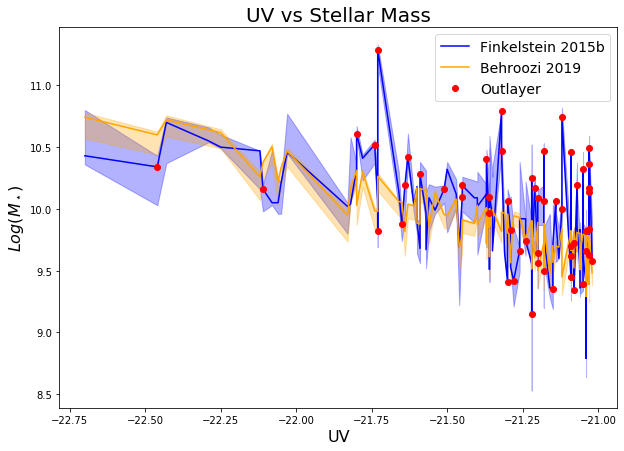

In [99]:
plt.figure(figsize=(10,7))
plt.title("UV vs Stellar Mass", fontsize=20)
plt.plot(tabla["1500Mag"],tabla["logM*"], label="Finkelstein 2015b",color='b')
plt.fill_between(tabla["1500Mag"], tabla["b_logM*"], tabla["B_logM*"],color="b", alpha=.3)
plt.plot(tabla["1500Mag"],tabla["log_SM"], label="Behroozi 2019",color="orange")
plt.fill_between(tabla["1500Mag"], tabla["log_b_SM"], tabla["log_B_SM"],color="orange", alpha=.3)
mask = (tabla["b_logM*"]>tabla["log_B_SM"]) | (tabla["B_logM*"]<tabla["log_b_SM"])
outlayer = tabla[mask]
plt.plot(outlayer["1500Mag"],outlayer["logM*"],"ro",label="Outlayer")

plt.legend( fontsize=14)
plt.xlabel("UV", fontsize=16)
plt.ylabel("$Log(M_\star)$", fontsize=16)
plt.savefig("images/behroozi_finkelstein_uvsm.jpg")

Text(0, 0.5, '$Log(M_h)$')

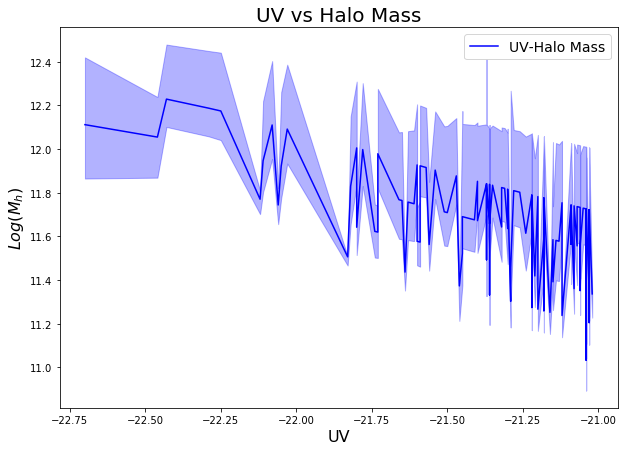

In [98]:
plt.figure(figsize=(10,7))
plt.title("UV vs Halo Mass", fontsize=20)
plt.plot(tabla["1500Mag"],tabla["log_HM"], label="UV-Halo Mass",color='b')
plt.fill_between(tabla["1500Mag"], tabla["log_b_HM"], tabla["log_B_HM"],color="b", alpha=.3)

plt.legend( fontsize=14)
plt.xlabel("UV", fontsize=16)
plt.ylabel("$Log(M_h)$", fontsize=16)